In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loading training data    
data = np.load(r'C:\Users\ishit\Downloads\species_data\species\species_train.npz')
train_locs = data['train_locs']  # 2D array, rows are number of datapoints and 
                                 # columns are "latitude" and "longitude"
train_ids = data['train_ids']    # 1D array, entries are the ID of the species 
                                 # that is present at the corresponding location in train_locs
species = data['taxon_ids']      # list of species IDe. Note these do not necessarily start at 0 (or 1)
species_names = dict(zip(data['taxon_ids'], data['taxon_names']))  # latin names of species 

# loading test data 
data_test = np.load(r'C:\Users\ishit\Downloads\species_data\species\species_test.npz', allow_pickle=True)
test_locs = data_test['test_locs']    # 2D array, rows are number of datapoints 
                                      # and columns are "latitude" and "longitude"
# data_test['test_pos_inds'] is a list of lists, where each list corresponds to 
# the indices in test_locs where a given species is present, it can be assumed 
# that they are not present in the other locations 
test_pos_inds = dict(zip(data_test['taxon_ids'], data_test['test_pos_inds'])) 

# Data Visualisation

Train Stats:
Number of species in train set:            500
Number of train locations:                 272037
Average number of locations per species:   544.074
Minimum number of locations for a species: 50
Maximum number of locations for a species: 2000


C:\Users\ishit\AppData\Local\Temp\ipykernel_20112\3039337653.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10", num_species)



Displaying species 41301 - Tadarida brasiliensis


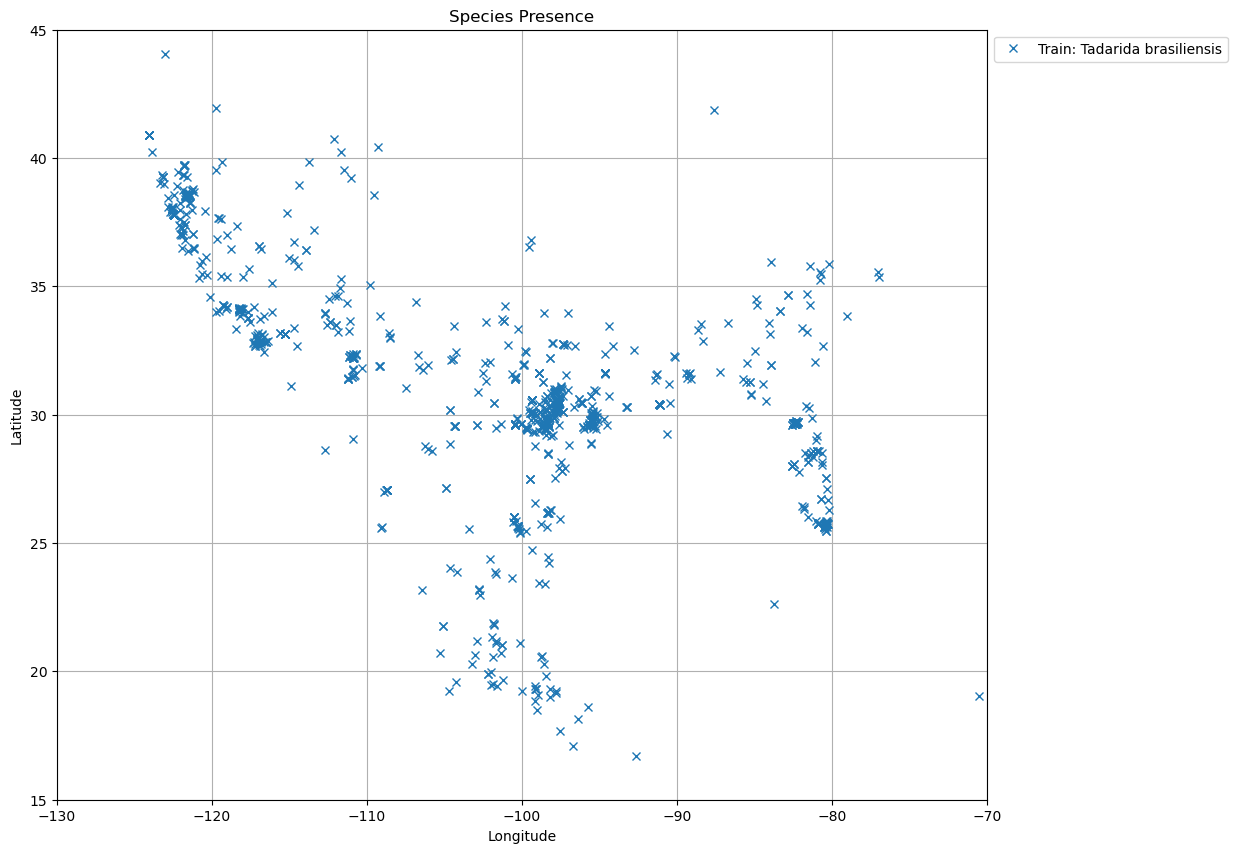

In [22]:
# data stats
print('Train Stats:')
print('Number of species in train set:           ', len(species))
print('Number of train locations:                ', train_locs.shape[0])
_, species_counts = np.unique(train_ids, return_counts=True)
print('Average number of locations per species:  ', species_counts.mean())
print('Minimum number of locations for a species:', species_counts.min())
print('Maximum number of locations for a species:', species_counts.max())


import numpy as np
import matplotlib.pyplot as plt

# Example species list
#species_list = [9602, 40323, 10243, 10373, 19975, 7562, 16782, 35854, 20504, 18204, 4765, 145310, 199841, 26159, 4146, 19765, 4535, 10168, 4793, 4665, 13632, 9152, 11970, 65987, 24266, 73172, 41301, 64985, 74204, 32093, 19182, 42223, 539892, 12024, 9083, 38008]
species_list=[41301]
# Number of species in the list
num_species = len(species_list)

plt.close('all')
plt.figure(figsize=(12, 10))

colormap = plt.cm.get_cmap("tab10", num_species)  

# Loop for multiple specie visualization
for i, sp in enumerate(species_list):
    print(f'\nDisplaying species {sp} - {species_names[sp]}')

    # Get test locations for the current species
    test_inds_pos = test_pos_inds[sp]
    test_inds_neg = np.setdiff1d(np.arange(test_locs.shape[0]), test_pos_inds[sp])

    # Plot test locations where species is present
    #plt.plot(test_locs[test_inds_pos, 1], test_locs[test_inds_pos, 0], 
        #     '.', color=colormap(i), label=f'Test: {species_names[sp]}')
    # Get train locations where the selected species is present
    train_inds_pos = np.where(train_ids == sp)[0]
    plt.plot(train_locs[train_inds_pos, 1], train_locs[train_inds_pos, 0], 
            'x', color=colormap(i), label=f'Train: {species_names[sp]}')

# Configure plot title, labels, and limits
plt.title('Species Presence')
plt.grid(True)
plt.xlim([-130, -70])
plt.ylim([15, 45])
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

